<a href="https://colab.research.google.com/github/KuriaDan/IPW8/blob/master/IPCW8_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Machine Learning Model

## 1. Defining the Question

### a) Specifying the Question

Model that determines whether or not a patient's symptoms indicate that the patient has hypothyroidsm.

### b) Defining the Metric for Success

Create models with accuracy greater that 95%

### c) Understanding the context 

Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to run the body's metabolism, it is understandable that people with this condition will have symptoms associated with a slow metabolism. In fact, as many as 10% of women may have some degree of thyroid hormone deficiency.  

### e) Data Relevance

## 2. Reading the Data

In [0]:
# importing the libraries we will need.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from pprint import pprint
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import MinMaxScaler


In [0]:
# Loading the Dataset
hypo=pd.read_csv('hypothyroid.csv')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
hypo.shape

(3163, 26)

In [4]:
# Previewing the top of our dataset
#
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Previewing the bottom of our dataset
# 
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking whether each column has an appropriate datatype
#ractice

hypo.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

> The columns don't have appropriate datatypes

## 4. External Data Source Validation

The measurements were validated online as the standard tests for a patient with hypothyroidism

## 5. Tidying the Dataset

In [7]:
# printing the number of unique values and the unique values in the dataframe
for x in hypo.columns: #iterating through the columns.
    print(hypo[x].unique()) # Printing the unique values in each column
    print('number of unique values', hypo[x].nunique(), '>>>>>>>>>>>>>>', x) #Printing number of unique values
    print('************************************************')
    print('\n')
   

['hypothyroid' 'negative']
number of unique values 2 >>>>>>>>>>>>>> status
************************************************


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
number of unique values 93 >>>>>>>>>>>>>> age
************************************************


['M' 'F' '?']
number of unique values 3 >>>>>>>>>>>>>> sex
************************************************


['f' 't']
number of unique values 2 >>>>>>>>>>>>>> on_thyroxine
************************************************


['f' 't']
number of unique values 2 >>>>>>>>>>>>>> query_on_thyroxine
*****************

In [8]:
# Identifying the Missing Data
#
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

> From the loop, we observed that the dataset has missing values. However, they are labeled as '?' rather than as Nan.

In [0]:
# replacing the values filled as '?' with np.nan
hypo=hypo.replace(['?'], np.nan)

In [10]:
# Checking for null values
hypo.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
# Creating a list of numerical columns
numeric=['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4', 'TBG']
for x in hypo.columns:
    if x in numeric:
        hypo[x]=pd.to_numeric(hypo[x])
    else:
         hypo[x]=hypo[x].astype('category')

In [12]:
hypo.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [13]:
measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']
for i,j in zip(measured,unit):
 print(hypo.groupby(i)[j].mean())

TSH_measured
n        NaN
y    5.92318
Name: TSH, dtype: float64
T3_measured
n         NaN
y    1.939749
Name: T3, dtype: float64
TT4_measured
n       NaN
y    108.85
Name: TT4, dtype: float64
T4U_measured
n         NaN
y    0.978199
Name: T4U, dtype: float64
FTI_measured
n           NaN
y    115.397771
Name: FTI, dtype: float64
TBG_measured
n          NaN
y    31.283077
Name: TBG, dtype: float64


> The null values in the measured columns were for the datapoints whose the test was not performed. we can therefore fill the null values in those columns with 0.

In [0]:
# Filling the null values in the numeric columns with the mean.
# creating a list of the numerical columns.
numeric=['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'TBG']
# Iterating through all columns
for x in hypo.columns:
# a condition if the column is in the list created above
    if x in numeric:
# Filling each columns null values with 0       
        hypo[x]=hypo[x].fillna(0)
    elif x == 'age':
# Filling age column null values with the mean.
        hypo[x]=hypo[x].fillna(hypo[x].mean())
    else:
#  Filling the null values in the age column with the mode          
        hypo[x]= hypo[x].fillna(hypo[x].mode()[0])   

In [15]:
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [16]:
# Checking for duplicated rows
hypo.duplicated().sum()

77

In [17]:
# Dropping duplicate rows
hypo=hypo.drop_duplicates()
hypo.duplicated().sum()

0

## 6. Exploratory Analysis

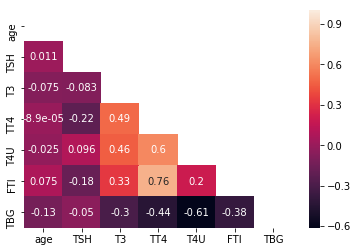

In [18]:
mask=np.zeros_like(hypo.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(hypo.corr(), annot=True, mask=mask)

In [19]:
# Creating a dataframe of the VIF
#
corrs=hypo[numeric].corr()
vif_df = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif_df

,FTI,T3,T4U,TSH,TT4,TBG
FTI,3.928508,-0.111046,2.388898,-0.312705,-3.895304,1.206623
T3,-0.111046,1.401424,-0.438363,0.059764,-0.349944,-0.041648
T4U,2.388898,-0.438363,3.725489,-0.590533,-3.254215,1.604231
TSH,-0.312705,0.059764,-0.590533,1.176925,0.797434,-0.052976
TT4,-3.895304,-0.349944,-3.254215,0.797434,5.819932,-0.988988
TBG,1.206623,-0.041648,1.604231,-0.052976,-0.988988,1.995498


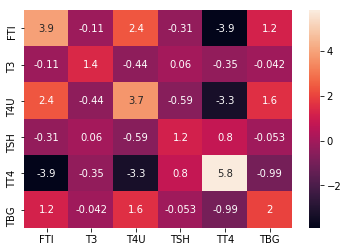

In [20]:
sns.heatmap(vif_df, annot = True)

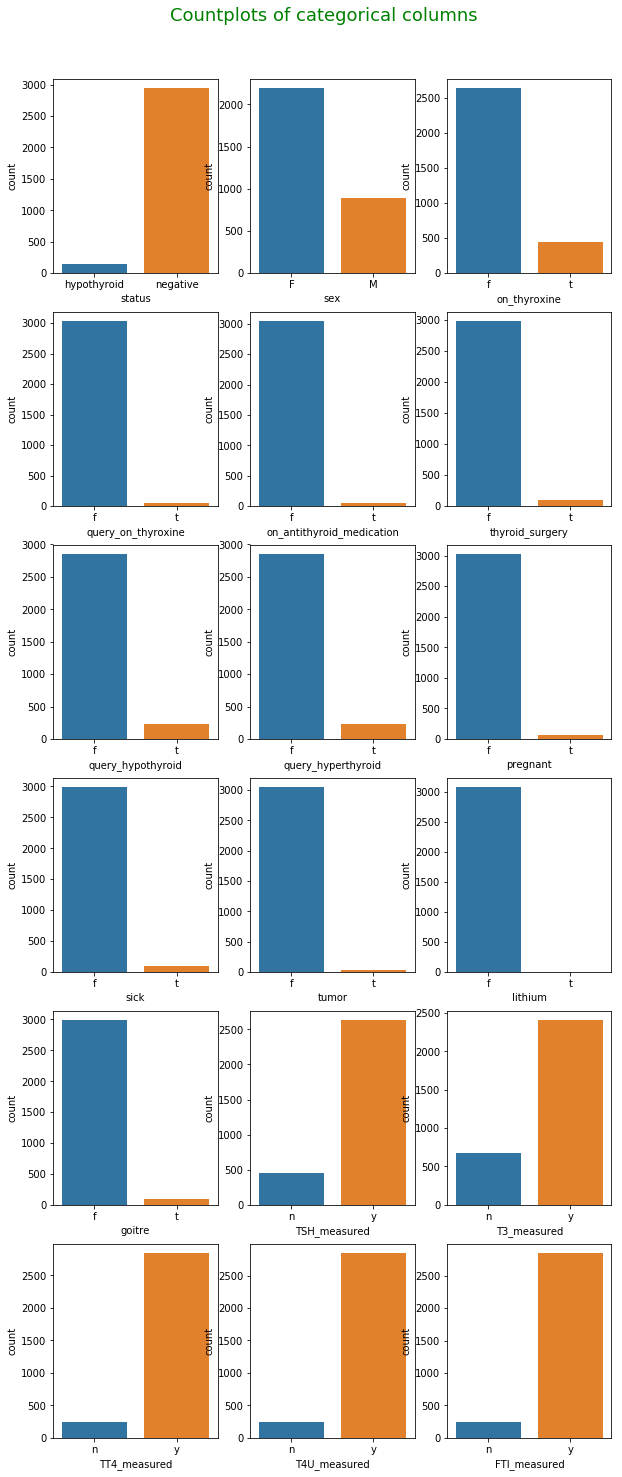

In [21]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset
cat=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured',
       'T4U_measured', 'FTI_measured', 'TBG_measured']

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 0.92, color = 'green')
for ax, data, column in zip(axes.flatten(), hypo, cat):
    sns.countplot(hypo[column], ax=ax)

> From the countplots, we can see that our data is highly imbalanced as most of the data points are on the people who tested negative on hypothyroidism.
> Also, most of the data is on patients who have test results.
> We can also hypothesize that most of the patients are female, are not on thyroxine, are not on antithyroid medication, have not undergone thyroid surgery, are not pregnant, are not sick, don't have tumors, are not on Lithium and don't have goitre.

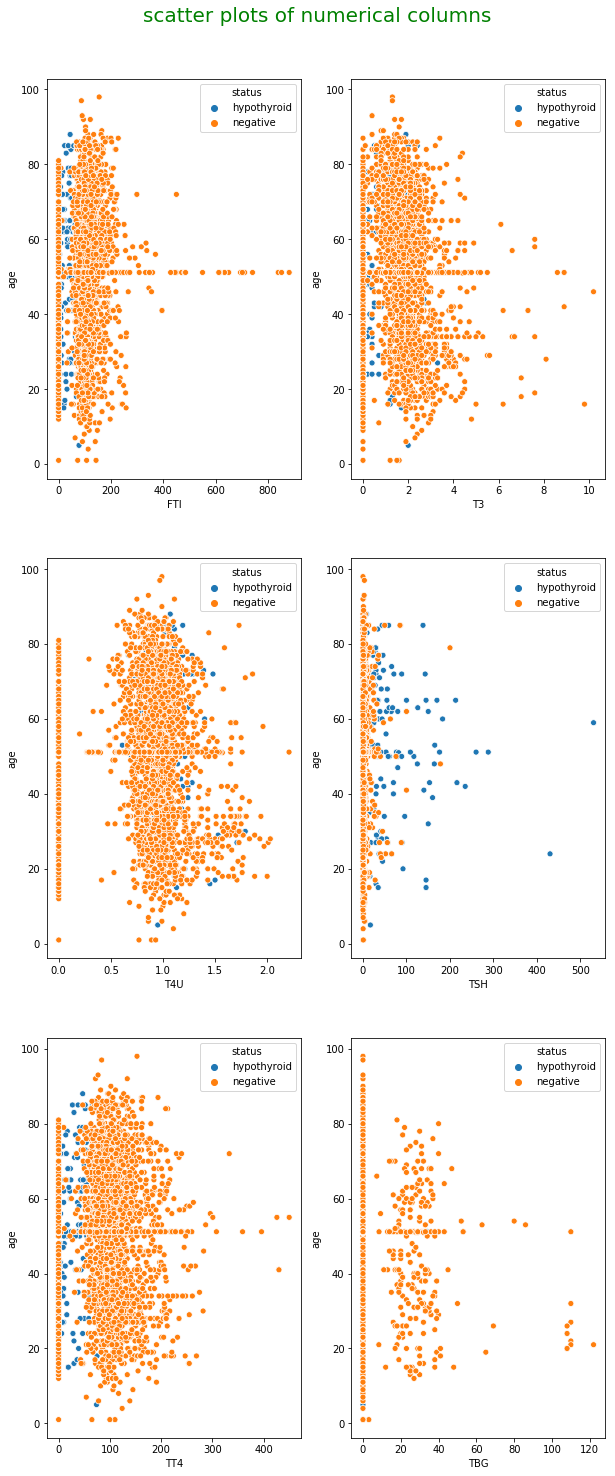

In [22]:
numeric = ['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'TBG']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,25))
plt.suptitle('scatter plots of numerical columns', fontsize = 20, y = 0.92, color = 'green')
for ax, data, column in zip(axes.flatten(), hypo, numeric):
    sns.scatterplot(hypo[column],hypo['age'], ax=ax, hue=hypo.status)

>From the scatterplots, we can hypothesize that patients who had high amounts of thyroid stimulating hormone (TSH) in their blood had hypothyroidism

## 7. Implementing the Solution

### Approach 1: Decision Trees

#### 1. Random Forest

In [23]:
hypo.status.cat.categories

Index(['hypothyroid', 'negative'], dtype='object')

In [0]:
# Splitting the independent and dependent variables.
# We are predicting if one has hypothyroidism or not, so that's our target variable
x=hypo.drop('status', axis=1)
# Encoding the categorical columns in our dataset.
x=pd.get_dummies(x)
y=hypo['status']
# Training the model using 75% of our dataset
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0, stratify=y)
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
# Predict our test data with the above trained model
y_pred=forest.predict(x_test)
acc=accuracy_score(y_pred, y_test)
cm=confusion_matrix(y_pred, y_test)
#f1=f1_score(y_pred, y_test)
cl=classification_report(y_pred, y_test)
print(acc)
print(cm)
#print(f1)
print(cl)

0.9922279792746114
[[ 31   2]
 [  4 735]]
              precision    recall  f1-score   support

 hypothyroid       0.89      0.94      0.91        33
    negative       1.00      0.99      1.00       739

    accuracy                           0.99       772
   macro avg       0.94      0.97      0.95       772
weighted avg       0.99      0.99      0.99       772



In [0]:
# Looking for the parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


> We will try adjusting the following set of hyperparameters 

     n_estimators = number of trees in the forest
     max_features = max number of features considered for splitting a node
     max_depth = max number of levels in eavh decision tree
     min_samples_split = min number of data points placed in a node before the node is split.
     min_samples_leaf = min number of data points allowed in a leaf node
     bootstrap = method of sampling data points(with or without replacement)

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [0]:
# Use the random grid to search for best hyperparameters
# We will use the above model
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
 

In [0]:
# Printing the best parameters of the model
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [0]:
# Creating a function that evaluates a models performance.
def evaluate(model, x_test, y_test):
    prediction=model.predict(x_test)
    acc=accuracy_score(prediction, y_test)
    cm=confusion_matrix(prediction, y_test)
    print('Model performance')
    print('*****************')
    print('Accuracy', acc)
    print(cm)
    return acc

    
    
    
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model performance
*****************
Accuracy 0.9909326424870466
[[ 30   2]
 [  5 735]]


> The model's accuracy reduced from 99.0% to 98.9%. this small decrease in performance indicates we have reached diminishing returns for hyperparameter tuning.

In [0]:
# Get numerical feature importances
test_features = x.columns.to_list()
importances = forest.feature_importances_.tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
# We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TSH                  Importance: 0.29
Variable: FTI                  Importance: 0.26
Variable: TT4                  Importance: 0.14
Variable: T4U                  Importance: 0.06
Variable: T3                   Importance: 0.05
Variable: age                  Importance: 0.04
Variable: TSH_measured_n       Importance: 0.02
Variable: TBG                  Importance: 0.01
Variable: sex_M                Importance: 0.01
Variable: on_thyroxine_f       Importance: 0.01
Variable: on_thyroxine_t       Importance: 0.01
Variable: on_antithyroid_medication_f Importance: 0.01
Variable: on_antithyroid_medication_t Importance: 0.01
Variable: query_hypothyroid_f  Importance: 0.01
Variable: query_hypothyroid_t  Importance: 0.01
Variable: TSH_measured_y       Importance: 0.01
Variable: T3_measured_n        Importance: 0.01
Variable: T3_measured_y        Importance: 0.01
Variable: TT4_measured_y       Importance: 0.01
Variable: T4U_measured_y       Importance: 0.01
Variable: TBG_measured_y  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Variable Importances')

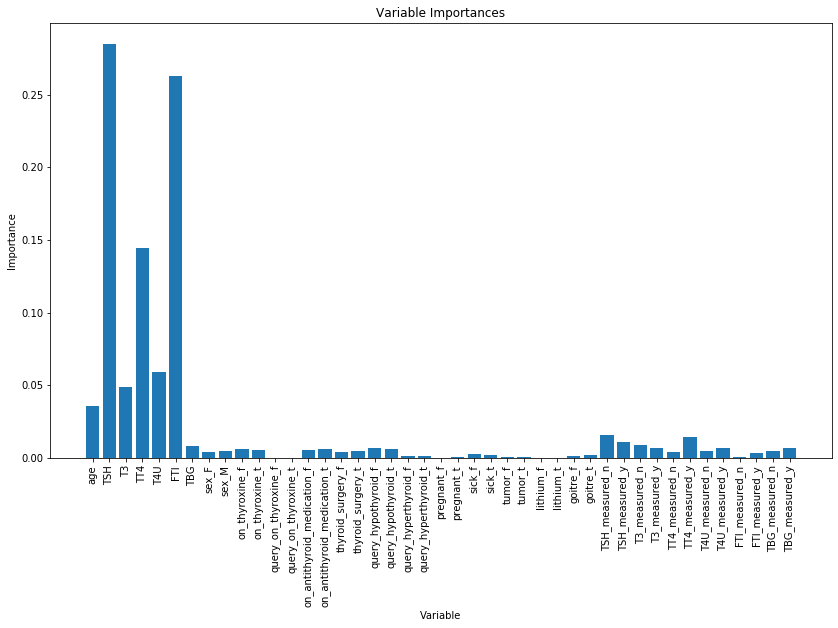

In [0]:
# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.figure(figsize=(14, 8))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

>The most important features in predicting if one has hupothyroidism are TSH, FTI, TT4 and T4U

#### 2: Gradient Boosted trees

In [0]:
# Building the model
boost=XGBClassifier()
boost.fit(x_train, y_train)
y_pred=boost.predict(x_test)
# Model Evaluation
acc=accuracy_score(y_pred, y_test)
cm=confusion_matrix(y_pred, y_test)
cl=classification_report(y_pred, y_test)
print(acc)
print(cm)
print(cl)

0.9961139896373057
[[ 34   2]
 [  1 735]]
              precision    recall  f1-score   support

 hypothyroid       0.97      0.94      0.96        36
    negative       1.00      1.00      1.00       736

    accuracy                           1.00       772
   macro avg       0.98      0.97      0.98       772
weighted avg       1.00      1.00      1.00       772



In [0]:
# Looking for the parameters used by our current xgboost algorithm
print('Parameters currently in use:\n')
pprint(boost.get_params())


### Approach 2: Support Vector Machine

In [0]:
a=hypo[['TSH', 'FTI']]
b=hypo['status']
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.25, random_state=0)
# Spot Check Algorithms
models = []
models.append(('Polynormial', SVC(kernel='poly') ))
models.append(('Radial Basis Function', SVC(kernel='rbf')))
models.append(('Linear', SVC(kernel='linear')))
models.append(('Sigmoid', SVC(kernel='sigmoid')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=3, random_state=0)
   cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

Polynormial: 0.967155 (0.002680)
Radial Basis Function: 0.953330 (0.004209)
Linear: 0.974934 (0.005230)
Sigmoid: 0.954193 (0.002638)


In [30]:
# Selecting the independent variables and the target variable
#
X = hypo[['TSH', 'FTI']].iloc[:150, :].values
y = np.where(hypo.status == 'hypothyroid', 1, 0)[:150]
# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')
# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
 # Splitting the data into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
 # Standardising the data
 sc = MinMaxScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)
 # Training the model and making predictions
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 # Measuring the accuracy of the model
 f1 = f1_score(y_test, y_pred)
 acc = accuracy_score(y_test, y_pred)
 # Returning the accuracy and the model
 return acc, f1, model
# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
 print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')


The accuracy score of Polynomial is: 0.9777777777777777 and the f1 score is: 0.9887640449438202
The accuracy score of Linear     is: 0.9555555555555556 and the f1 score is: 0.9772727272727273
The accuracy score of Rbf        is: 0.9777777777777777 and the f1 score is: 0.9887640449438202


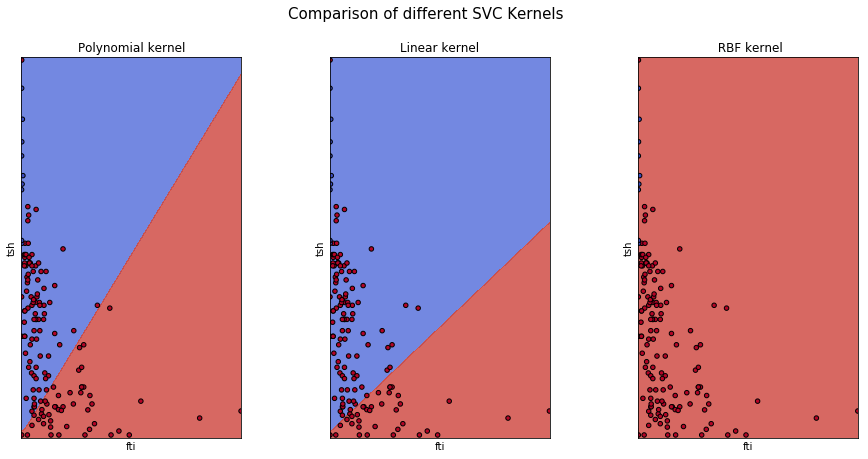

In [31]:
def make_meshgrid(x, y, h=.02):
   x_min, x_max = x.min() - 1, x.max() + 1
   y_min, y_max = y.min() - 1, y.max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
   return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)
   out = ax.contourf(xx, yy, Z, **params)
   return out
# Set-up 1x3 grid for plotting.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Comparison of different SVC Kernels', fontsize = 15)
# title for the plots
titles = ('Polynomial kernel', 'Linear kernel', ' RBF kernel')
# Randomly selecting 300 datapoints to plot
# X = hypo[['TSH', 'FTI']].iloc[:150, :].values
# y=y = np.where(hypo.status == 'hypothyroid', 1, 0).iloc[:150, :].values
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, axes.flatten()):
   plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
   ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
   ax.set_xlim(xx.min(), xx.max())
   ax.set_ylim(yy.min(), yy.max())
   ax.set_xlabel('fti')
   ax.set_ylabel('tsh')
   ax.set_xticks(())
   ax.set_yticks(())
   ax.set_title(title)
plt.show()

In [0]:
# Creating an SVC model with linear kernel with all the variables.
# Splitting the independent and dependent variables.
# We are predicting if one has hypothyroidism or not, so that's our target variable
x=hypo.drop('status', axis=1)
# Encoding the categorical columns in our dataset.
x=pd.get_dummies(x)
y=hypo['status']
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
# Training the model using 75% of our dataset
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0, stratify=y)
# Building the model
linear=SVC(kernel='linear')
linear.fit(x_train, y_train)
y_pred=linear.predict(x_test)
# Model Evaluation
acc=accuracy_score(y_pred, y_test)
cm=confusion_matrix(y_pred, y_test)
cl=classification_report(y_pred, y_test)
print(acc)
print(cm)
print(cl)

0.9844559585492227
[[ 27   4]
 [  8 733]]
              precision    recall  f1-score   support

 hypothyroid       0.77      0.87      0.82        31
    negative       0.99      0.99      0.99       741

    accuracy                           0.98       772
   macro avg       0.88      0.93      0.91       772
weighted avg       0.99      0.98      0.98       772



In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

## 8. Challenging the solution

> All the models have an accuracy higher than 98%. This may have been as a result of overfitting. More data should be collected to test the models stability before deployment.


